In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load

In [95]:
df = pd.read_csv('../global_preprocessed_without_onehot.csv', encoding='ISO-8859-1')
df_extended = df[["extended"]]
df = df[["nkill", "nperps"]]
row_count = df.shape[0]
column_count = df.shape[1]
df = df[:row_count//10]
row_count = df.shape[0]
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 17128 rows.
The DataFrame has 2 columns.


In [96]:
kmeans = load("kmeans_model.joblib")

0        0
1        0
2        0
3        0
4        0
        ..
17123    0
17124    0
17125    0
17126    0
17127    0
Name: kmeans_cluster, Length: 17128, dtype: int32 0         0
1         0
2         0
3         0
4         0
         ..
171275    0
171276    0
171277    0
171278    0
171279    0
Name: extended, Length: 171280, dtype: int64


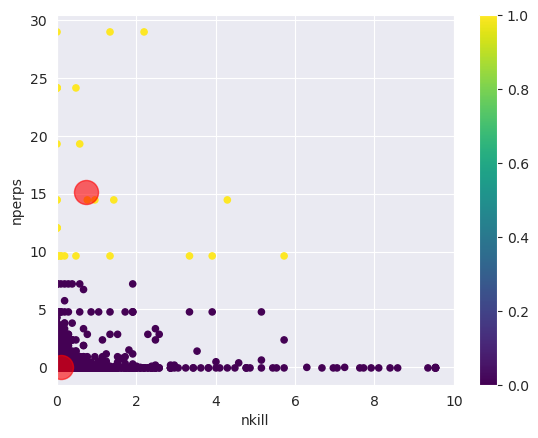

In [97]:
df['kmeans_cluster'] = kmeans.predict(df)
# Plot the clusters
df.plot.scatter( c=df['kmeans_cluster'], cmap='viridis', x="nkill",y="nperps")
plt.xlim(0, 10)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.6) # plot centroids

plt.show()

In [98]:
matrix = confusion_matrix(df['nperps'], df['kmeans_cluster'])

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.show()

# Crosstab method
pd.crosstab(df['kmeans_cluster'], df_extended["extended"])

ValueError: Classification metrics can't handle a mix of continuous and binary targets